# Imports and paths configuration

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
cd ..

/Users/khuenm/imdumb/AML_Task_1


In [1]:
import sys
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import umap.plot
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC

/Users/andreas/opt/anaconda3/envs/aml_task1/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [2]:
AMBER = '#F5B14C'

sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":10,
                                "axes.titlesize":16,
                                "axes.labelsize":14})
stacked_bar_chart_color = [
    'dimgrey','darkgrey','lightgrey','peachpuff','sandybrown','chocolate','saddlebrown'
]

BARCHART_BLUE = '#3a678b'

In [4]:
data_dir = '../data'

train_data_path = os.path.join(data_dir, 'X_train.csv')
train_data = pd.read_csv(train_data_path).set_index('id')

label_path = os.path.join(data_dir, 'y_train.csv')
label = pd.read_csv(label_path).set_index('id')

# EDA

In [5]:
train_data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,
0.0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,10.227734,...,NaN,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1.0,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,11.436970,...,NaN,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764
2.0,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,10.810076,...,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3.0,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,10.092109,...,10008.251395,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN
4.0,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,12.006773,...,10095.782015,13772.061493,NaN,NaN,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207.0,18707.457475,13610.725702,3785.886941,113497.632841,109.526764,97.812339,11274.011935,10803.953566,10949.811419,NaN,...,8472.132451,17727.003274,1033.057071,104.838553,102.235191,3099.069091,3.079234,1362.889974,NaN,10110.360570
1208.0,17108.239122,12168.536128,3442.619145,98218.773311,100.468476,109.994258,11031.326117,10231.743317,10687.321177,10.238957,...,8839.251924,14721.087037,792.061138,105.823015,109.915094,3124.059793,2.935047,1577.404870,1026.749434,10620.330033
1209.0,14264.707321,9273.405761,3580.894003,101668.927699,102.620705,104.470375,9159.594864,10661.827392,10623.176915,10.132906,...,10264.321725,15226.056342,831.025190,101.926717,101.669153,2252.031870,NaN,1781.799720,1066.379647,10317.757445


In [128]:
set(train_data.dtypes)

{dtype('float64')}

## Distribution n features

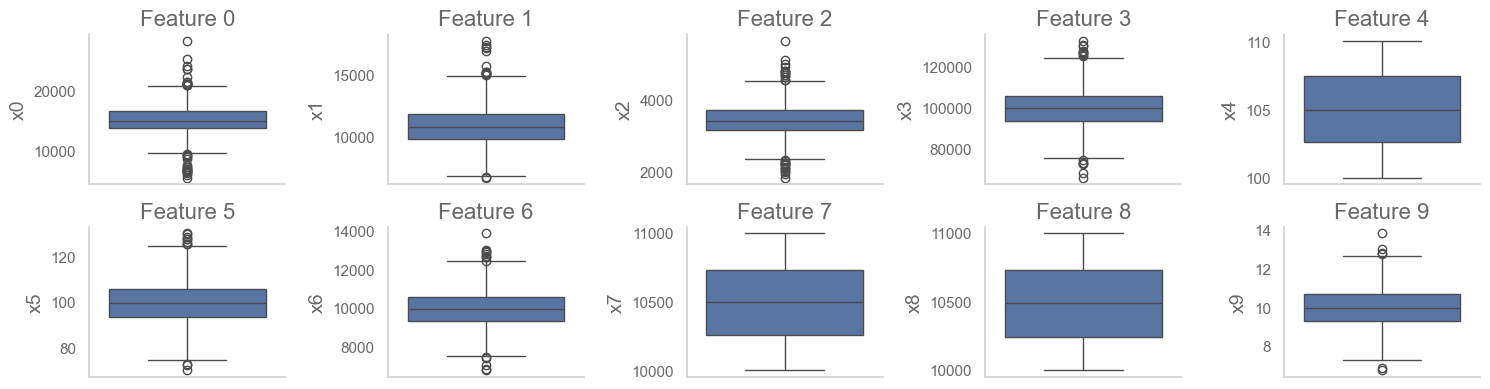

In [129]:
n_plots = 10
n_cols = 5
n_rows = int(np.ceil(n_plots/n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 2*n_rows))

for idx, ax in enumerate(axes.ravel()):
    if idx >= n_plots:
        ax.axis('off')
        continue

    sns.boxplot(train_data[f'x{idx}'], ax=ax)

    ax.set_title(f'Feature {idx}')

plt.tight_layout()
plt.show()

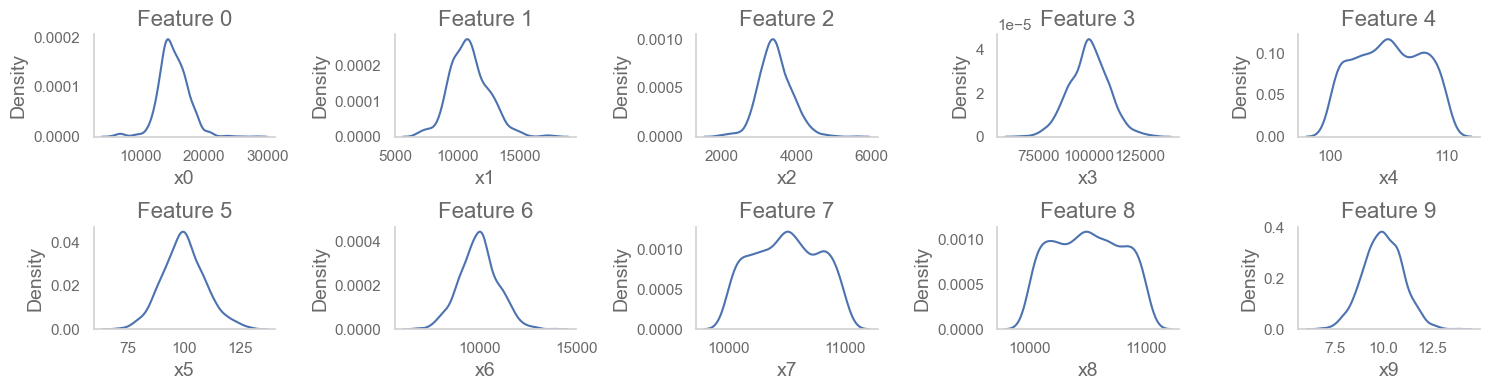

In [130]:
n_plots = 10
n_cols = 5
n_rows = int(np.ceil(n_plots/n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 2*n_rows))

for idx, ax in enumerate(axes.ravel()):
    if idx >= n_plots:
        ax.axis('off')
        continue

    sns.kdeplot(train_data[f'x{idx}'], ax=ax)

    ax.set_title(f'Feature {idx}')

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

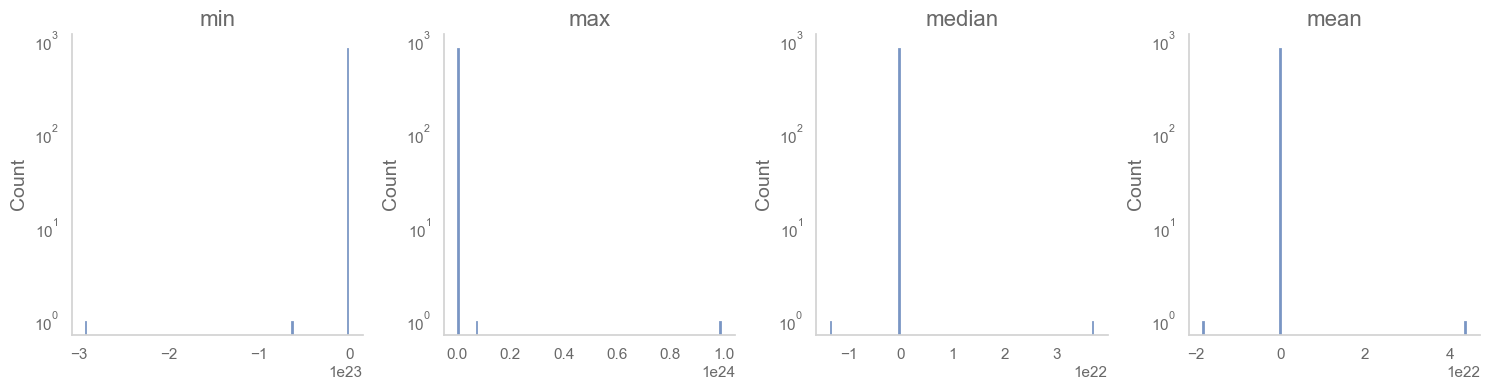

In [131]:
plt.figure(figsize=(15,5))
stats_dct = {'min': np.min, 'max': np.max, 'median': np.median, 'mean': np.mean}
n_plots = len(stats_dct)
n_cols = 4
n_rows = int(np.ceil(n_plots/n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4*n_rows))

for idx, ax in enumerate(axes.ravel()):
    if idx >= n_plots:
        ax.axis('off')
        continue
    curr_stats = list(stats_dct.keys())[idx]

    sns.histplot([stats_dct[curr_stats](train_data[feature_idx].dropna()) for feature_idx in train_data.columns], bins=100, ax=ax)

    ax.set_title(curr_stats)
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

## Impute missing data

<Axes: ylabel='Count'>

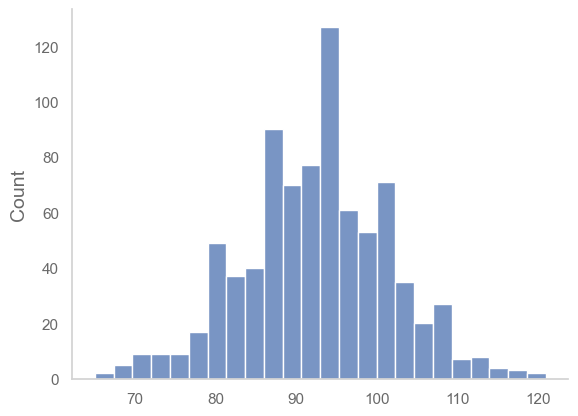

In [132]:
sns.histplot([train_data[feature_idx].isna().sum() for feature_idx in train_data.columns])

In [8]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

In [134]:
n_label_category = 10
indices = list(range(int(label.y.min()), int(label.y.max()+1)))
chunk_size = len(indices) // n_label_category
chunks = [indices[i:i+chunk_size] for i in range(0, len(indices), chunk_size)]

In [135]:
label_map = {}
for i in range(len(chunks)):
    for age in chunks[i]:
        label_map[age] = i

In [136]:
label['y_map'] = label.y.apply(lambda x: label_map[int(x)])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


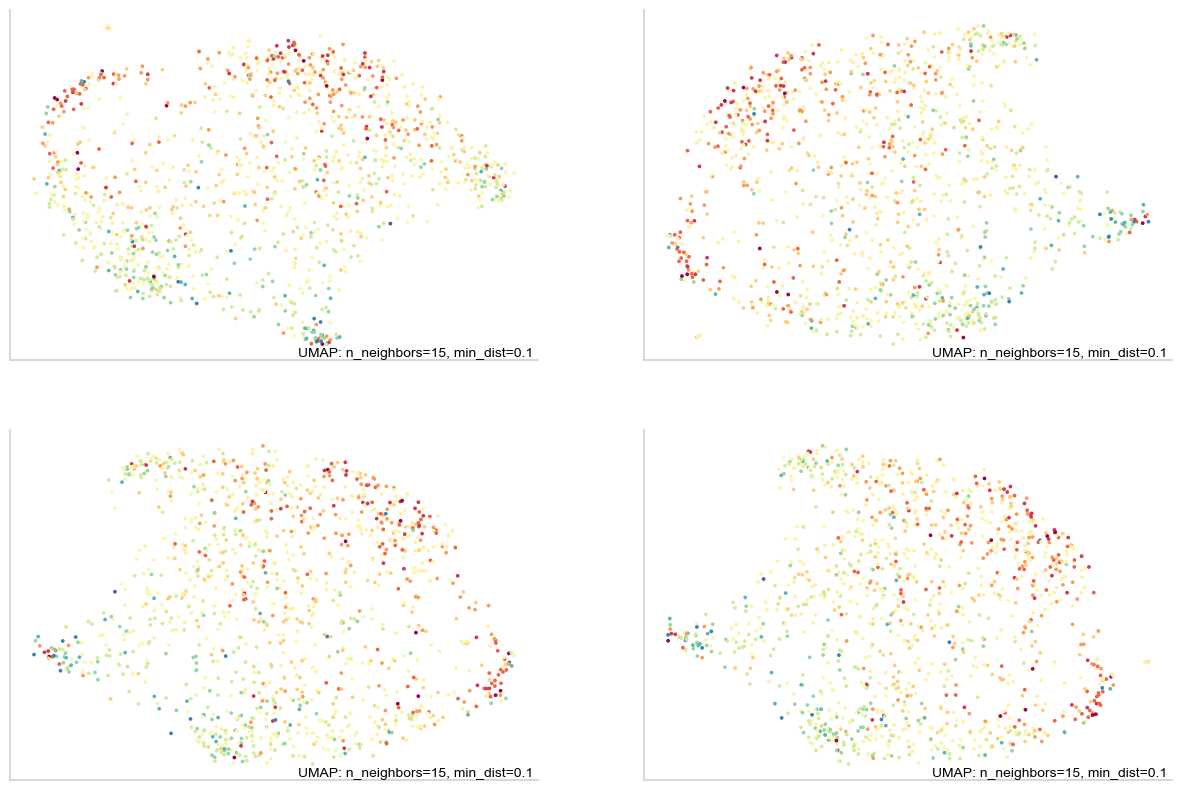

In [58]:
n_neighbor_knns = [5,10,15,20]
n_plots = len(n_neighbor_knns)
n_cols = 2
n_rows = int(np.ceil(n_plots/n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
plt.legend().set_visible(False)

for idx, ax in enumerate(axes.ravel()):
    if idx >= n_plots:
        ax.axis('off')
        continue
    knn_imputer = KNNImputer(n_neighbors=n_neighbor_knns[idx])
    train_data_scaled_imputed = knn_imputer.fit_transform(train_data_scaled)
    train_data_imputed = scaler.inverse_transform(train_data_scaled_imputed)
    train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)
    train_data_imputed_scaled = scaler.fit_transform(train_data_imputed)
    reducer = umap.UMAP()
    embedding = reducer.fit(train_data_imputed_scaled)

    umap.plot.points(embedding, labels=label.y_map, cmap='viridis', ax=ax)
    ax.get_legend().set_visible(False)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=15)
train_data_imputed_scaled = knn_imputer.fit_transform(train_data_scaled)
# train_data_imputed = scaler.inverse_transform(train_data_scaled_imputed)
# train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)
# train_data_imputed_scaled = scaler.fit_transform(train_data_imputed)
# train_data_imputed_scaled = pd.DataFrame(train_data_imputed_scaled, columns=train_data.columns)

## Outliers detection

### Modified z-score

In [61]:
outliers_indices = {}
for feature_idx in train_data_imputed.columns:
    feature = train_data_imputed[feature_idx].dropna()
    med = np.median(feature)
    mad = np.median(np.abs(feature - med))
    mod_z = 0.6745 * (feature - med)/mad
    curr_outliers_indices = set(mod_z[np.abs(mod_z) >= 3.5].index.tolist())
    outliers_indices[feature_idx] = curr_outliers_indices

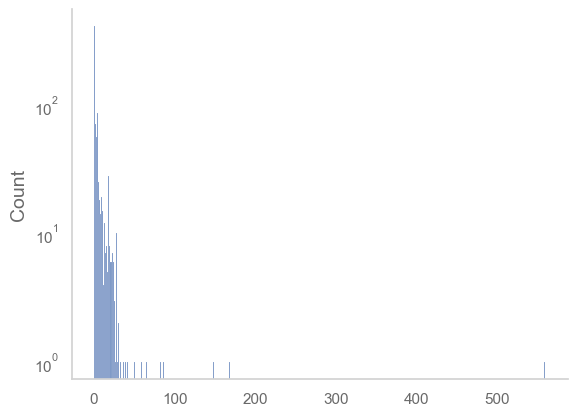

In [62]:
sns.histplot([len(indices) for indices in outliers_indices.values()])
plt.yscale('log')

In [68]:
train_data.shape

(1212, 832)

In [72]:
outliers_indices_mat = np.zeros(train_data.shape).T
for i, v in enumerate(outliers_indices.values()):
    outliers_indices_mat[i][list(v)] = 1

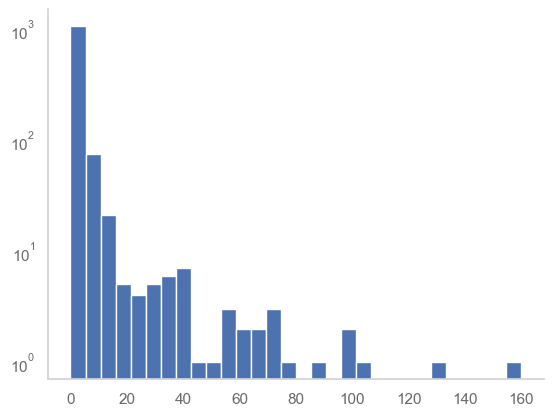

In [78]:
plt.hist(outliers_indices_mat.sum(axis=0), bins=30)
plt.yscale('log')

In [79]:
len(reduce(lambda x,y: x|y, outliers_indices.values()))

1009

### Z-score

In [106]:
outliers_indices = {}
for feature_idx in train_data_imputed.columns:
    feature = train_data_imputed[feature_idx].dropna()
    mean = np.mean(feature)
    std = np.std(feature)
    z_score = (feature - mean)/std
    curr_outliers_indices = set(z_score[np.abs(z_score) > 3].index.tolist())
    outliers_indices[feature_idx] = curr_outliers_indices

In [107]:
len(reduce(lambda x,y: x|y, outliers_indices.values()))

968

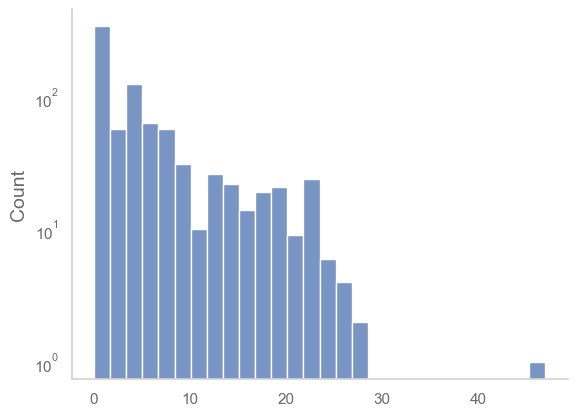

In [108]:
sns.histplot([len(indices) for indices in outliers_indices.values()])
plt.yscale('log')

In [94]:
outliers_indices_mat = np.zeros(train_data.shape).T
for i, v in enumerate(outliers_indices.values()):
    outliers_indices_mat[i][list(v)] = 1

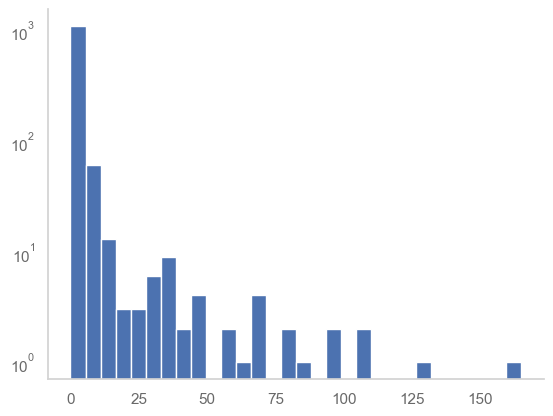

In [95]:
plt.hist(outliers_indices_mat.sum(axis=0), bins=30)
plt.yscale('log')

### Z-score flexible limit

In [138]:
outliers_indices = {}
for feature_idx in train_data_imputed.columns:
    feature = train_data_imputed[feature_idx].dropna()
    mean = np.mean(feature)
    std = np.std(feature)
    lower_limit = mean - 3*std
    upper_limit = mean + 3*std
    curr_outliers_indices = set(feature[(feature < lower_limit) | (feature > upper_limit)].index.tolist())
    outliers_indices[feature_idx] = curr_outliers_indices

In [139]:
len(reduce(lambda x,y: x|y, outliers_indices.values()))

968

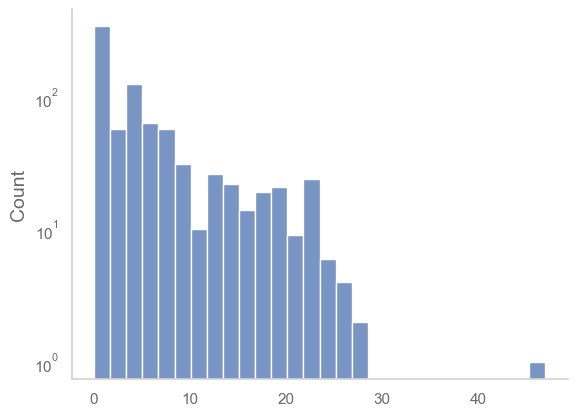

In [140]:
sns.histplot([len(indices) for indices in outliers_indices.values()])
plt.yscale('log')

### Cap outliers

In [11]:
for feature_idx in train_data_imputed_scaled.columns:
    feature = train_data_imputed_scaled[feature_idx].dropna()
    mean = np.mean(feature)
    std = np.std(feature)
    lower_limit = mean - 3*std
    upper_limit = mean + 3*std
    train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] < lower_limit][feature_idx] = lower_limit
    train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] > upper_limit][feature_idx] = upper_limit

/var/folders/y0/zwmr69611sl809vcxxhhlgjh0000gn/T/ipykernel_49735/4260415211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] < lower_limit][feature_idx] = lower_limit
/var/folders/y0/zwmr69611sl809vcxxhhlgjh0000gn/T/ipykernel_49735/4260415211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] > upper_limit][feature_idx] = upper_limit


In [12]:
train_data_imputed_scaled.shape

(1212, 832)

## Feature selection

### Correlation analysis

In [10]:
train_data_scaled = StandardScaler().fit_transform(train_data_imputed)

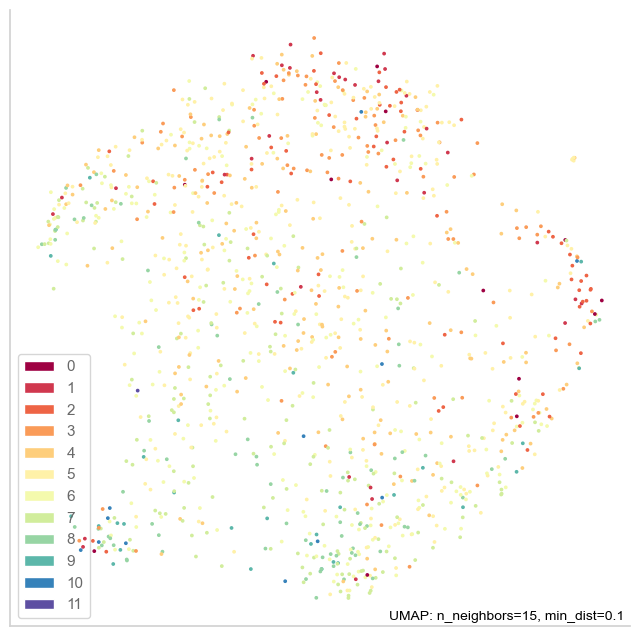

In [151]:
reducer = umap.UMAP()
embedding = reducer.fit(train_data_scaled)
umap.plot.points(embedding, labels=label.y_map, cmap='viridis')
plt.show()

In [15]:
train_data_imputed_feature_selection = train_data_imputed_scaled.copy().to_numpy()

In [16]:
drop = True
threshold = 0.8
while drop:
    correlation_mat = np.corrcoef(train_data_imputed_feature_selection, rowvar=False)
    np.fill_diagonal(correlation_mat, 0)
    indices_to_drop = np.where(correlation_mat > 0.8)
    if len(indices_to_drop[0]) == 0:
        drop = False
    else:
        cols_to_drop = []
        for idx1, idx2 in zip(*indices_to_drop):
            if idx1 not in cols_to_drop and idx2 not in cols_to_drop:
                cols_to_drop.append(idx1)
        cols_to_keep = set(list(range(correlation_mat.shape[1]))) - set(cols_to_drop)
        # cols_to_drop = np.array(train_data_imputed_feature_selection.columns)[list(set(indices_to_drop[0]) | set(indices_to_drop[1]))]
        print(len(cols_to_drop))
        # train_data_imputed_feature_selection = train_data_imputed_feature_selection.drop(columns=cols_to_drop)
        train_data_imputed_feature_selection = train_data_imputed_feature_selection[:, list(cols_to_keep)]

104


### Lasso

In [54]:
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(train_data_imputed_scaled.to_numpy(), label.y)

# Identify important features (non-zero coefficients)
selected_features = np.where(lasso.coef_ != 0)[0]

train_data_imputed_feature_selection = train_data_imputed_scaled.to_numpy()[:, selected_features]
print(f"Number of selected features: {len(selected_features)}")

Number of selected features: 330


# Preprocessing recap

## Impute missing data - kNN

In [6]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
knn_imputer = KNNImputer(n_neighbors=15)
train_data_imputed_scaled = knn_imputer.fit_transform(train_data_scaled)
train_data_imputed_scaled = pd.DataFrame(train_data_imputed_scaled, columns=train_data.columns)

## Outliers detection - Z-score

In [7]:
for feature_idx in train_data_imputed_scaled.columns:
    feature = train_data_imputed_scaled[feature_idx].dropna()
    mean = np.mean(feature)
    std = np.std(feature)
    lower_limit = mean - 3*std
    upper_limit = mean + 3*std
    train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] < lower_limit][feature_idx] = lower_limit
    train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] > upper_limit][feature_idx] = upper_limit

/var/folders/xj/3lld_d65455bd0jp6zrm2cdm0000gn/T/ipykernel_3483/4260415211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] < lower_limit][feature_idx] = lower_limit
/var/folders/xj/3lld_d65455bd0jp6zrm2cdm0000gn/T/ipykernel_3483/4260415211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_imputed_scaled[train_data_imputed_scaled[feature_idx] > upper_limit][feature_idx] = upper_limit


## Feature selection

In [8]:
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(train_data_imputed_scaled.to_numpy(), label.y)

# Identify important features (non-zero coefficients)
selected_features = np.where(lasso.coef_ != 0)[0]

train_data_imputed_feature_selection = train_data_imputed_scaled.to_numpy()[:, selected_features]
print(f"Number of selected features: {len(selected_features)}")

Number of selected features: 330


# Prediction

In [56]:
def rounded_r2_score(y_true, y_pred):
    y_pred_rounded = np.floor(y_pred+0.5)
    return r2_score(y_true, y_pred_rounded)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

## Linear regression

In [57]:
scoring = make_scorer(rounded_r2_score)
model = LinearRegression()
X = train_data_imputed_feature_selection
y = label.y.tolist()
scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)

print(f"R^2 Scores for Each Fold: {scores}")
print(f"Average R^2 Score: {scores.mean()}")
print(f"Standard Deviation of R^2 Score: {scores.std()}")

R^2 Scores for Each Fold: [0.42967345 0.33982359 0.30499399 0.51056421 0.49509511]
Average R^2 Score: 0.4160300681352286
Standard Deviation of R^2 Score: 0.0818664315075047


Text(0.5, 1.0, "Cook's distance plot")

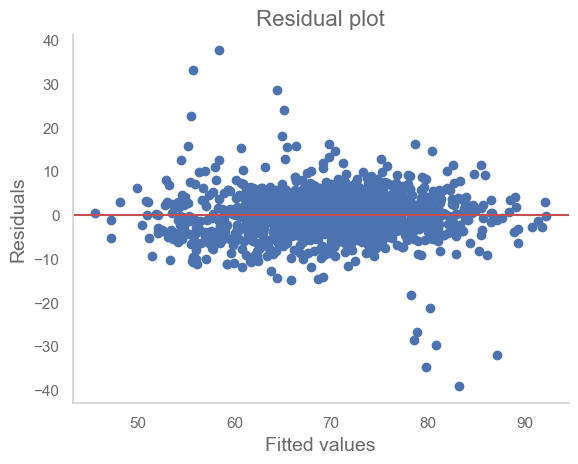

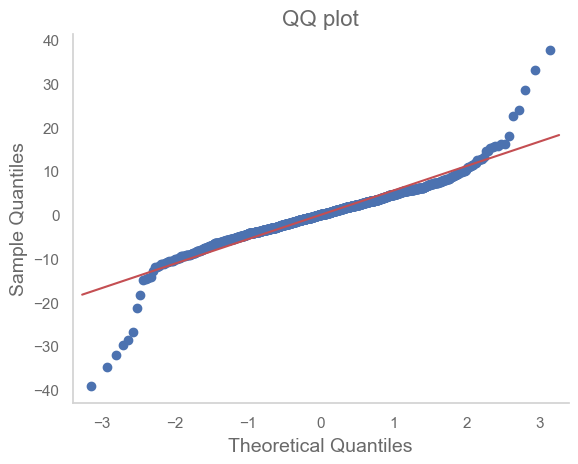

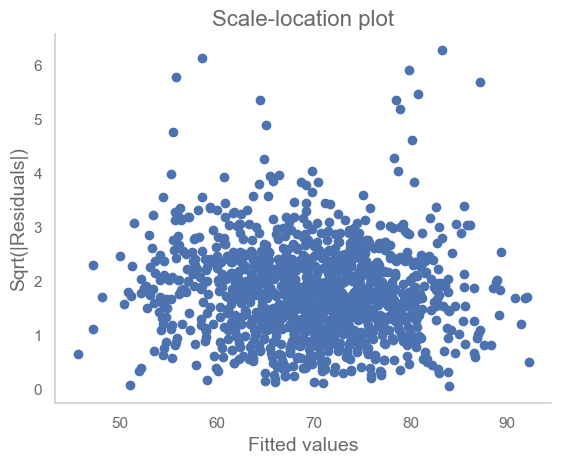

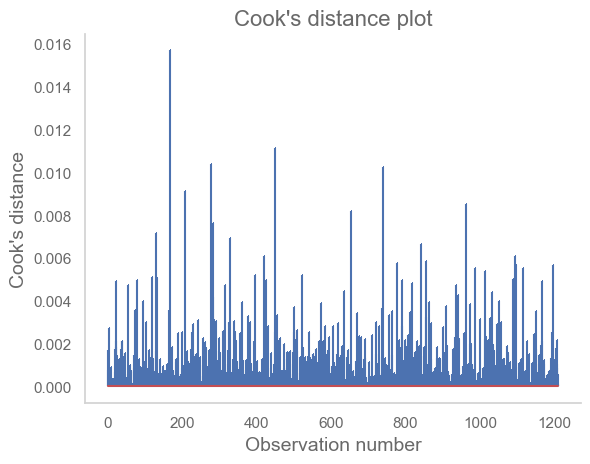

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the model
X = train_data_imputed_feature_selection
y = label.y
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Residual plot
fig, ax = plt.subplots()
ax.scatter(model.predict(X), model.resid)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')



# QQ plot
fig, ax = plt.subplots()
sm.qqplot(model.resid, ax=ax)
ax.set_title('QQ plot')

residual_std = np.std(model.resid)
mean_residual = np.mean(model.resid)
min_x, max_x = ax.get_xlim()
min_y, max_y = ax.get_ylim()
min_val = min(min_x, min_y)
max_val = max(max_x, max_y)
ax.plot([min_x, max_x], [min_x*residual_std, max_x*residual_std], color='r')


# Scale-location plot
fig, ax = plt.subplots()
ax.scatter(model.predict(X), np.sqrt(np.abs(model.resid)))
ax.set_xlabel('Fitted values')
ax.set_ylabel('Sqrt(|Residuals|)')
ax.set_title('Scale-location plot')

# Cook's distance plot
fig, ax = plt.subplots()
influence = model.get_influence()
(c, _) = influence.cooks_distance
ax.stem(np.arange(len(X)), c, markerfmt=",")
ax.set_xlabel('Observation number')
ax.set_ylabel('Cook\'s distance')
ax.set_title('Cook\'s distance plot')


## SVM

In [58]:
scoring = make_scorer(rounded_r2_score)
model = SVC(kernel='rbf', C=1)
X = train_data_imputed_feature_selection
y = label.y.tolist()
# Compute cross-validation scores
scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)

print(f"R^2 Scores for Each Fold: {scores}")
print(f"Average R^2 Score: {scores.mean()}")
print(f"Standard Deviation of R^2 Score: {scores.std()}")

R^2 Scores for Each Fold: [0.21517212 0.16125551 0.09891377 0.18561703 0.13055004]
Average R^2 Score: 0.15830169358265694
Standard Deviation of R^2 Score: 0.040709158681555065


## MLP

In [36]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [17]:
class MultiLabelMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiLabelMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)  # output_dim = number of labels

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)  # No activation here; we'll use BCEWithLogitsLoss

In [32]:
X = train_data_imputed_feature_selection
y = label.y.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [33]:
model = MultiLabelMLP(X_train.shape[1], 100)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
for epoch in range(epochs):
    print(epoch)
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

0


## TabPFN

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier

X = train_data_imputed_feature_selection
y = label.y.astype(int).tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# N_ensemble_configurations controls the number of model predictions that are ensembled with feature and class rotations (See our work for details).
# When N_ensemble_configurations > #features * #classes, no further averaging is applied.

classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [28]:
classifier.max_num_features = 1500
classifier.max_num_classes = 100

In [ ]:
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)

print('Accuracy', accuracy_score(y_test, y_eval))

In [ ]:
print(r2_score(y_test, y_eval))

# Hyperparameter tune